In [121]:
import pandas as pd

yelp_df = pd.read_csv('yelp_review_with_labels.csv')
yelp_df.head()

,business_id,name,city,state,stars,review_count,categories,review_id,review_stars,useful,funny,cool,text,date,polarity
0,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",rFfxQEA9wCmRYyqDSv1ecQ,4,0,1,0,Went here for all you can eat sushi dinner! Bo...,2017-11-11 19:16:19,0
1,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",MccdpC7TvFCTKO5Pdx37PA,1,1,1,0,The service was okay when it was present. The ...,2016-02-27 8:03:55,0
2,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",OS_uA1Dm7iV4NLGcgtZ9qw,5,0,0,1,Went here on the weekend for lunch and food/se...,2015-11-09 23:03:17,1
3,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",q37oYWTdZmXC8Z26nTR87Q,5,0,0,0,I've eaten here twice now and I'm really impre...,2017-07-12 16:52:23,1
4,bPBZEDuHbE-I7bxUWIYMhQ,Oishii Sushi,Calgary,AB,3.0,91,"Japanese, Restaurants, Sushi Bars",5w3lP3O8ZUO9kOTfQFi8pQ,1,1,1,1,Not good for groups.\n We came here tonight fo...,2016-04-04 5:57:54,0


In [122]:
#lowercase conversion  
yelp_df ['text'] = [i.lower() for i in yelp_df ['text']]
yelp_df ['text'][0]

"went here for all you can eat sushi dinner! bottomline: best all you can eat sushi in calgary! it costs $26 per person for sushi and sashimi and $32 for the deluxe menu which includes oysters and tataki. \n\nwe went a little overboard with ordering rolls (to the point that the waiter asked if we were sure we can finish haha) and then regretted it shortly after! there is a charge for unfinished food so it was a little stressful haha \n\nwe ordered the mango dragon roll (prawn tempura and avacado with mango), philadelphia roll, spicy salmon roll, beef udon, miso soup, salmon and tuna sashimi, salmon rose and prawn tempura. out of these my favourites were the spicy salmon and the mango dragon roll. i didn't love the tempura personally because it was a bit soggy. didn't have room for dessert after all this food so can't comment on that haha"

In [123]:
import string
import re
def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # remove leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

yelp_df["text"]=yelp_df['text'].map(lambda text: clean_text(text))

In [124]:
import nltk
nltk.download('wordnet')
from textblob import Word
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

# Lemmatize final review format
yelp_df['lemmatized_text'] = yelp_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [125]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

yelp_df["text_stemmed"] = yelp_df["text"].apply(lambda text: stem_words(text))
yelp_df['text'].head()

0    went here for all you can eat sushi dinner bot...
1    the service was okay when it was present the m...
2    went here on the weekend for lunch and foodser...
3    ive eaten here twice now and im really impress...
4    not good for groups we came here tonight for m...
Name: text, dtype: object

In [126]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

yelp_df["text"] = yelp_df["text"].apply(lambda text: remove_stopwords(text))
yelp_df['text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    went eat sushi dinner bottomline best eat sush...
1    service okay present menu particularly eat sus...
2    went weekend lunch foodservice fantastic never...
3    ive eaten twice im really impressed get lot pr...
4    good groups came tonight birthday dinner group...
Name: text, dtype: object

In [170]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, Dropout, Flatten, LSTM, Activation, Bidirectional

In [128]:
X=yelp_df["text"]
X.head(5)

0    went eat sushi dinner bottomline best eat sush...
1    service okay present menu particularly eat sus...
2    went weekend lunch foodservice fantastic never...
3    ive eaten twice im really impressed get lot pr...
4    good groups came tonight birthday dinner group...
Name: text, dtype: object

In [129]:
y=yelp_df["polarity"]
y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: polarity, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [131]:
max_features=1000
# Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train)+list(X_test))
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train)+list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [132]:
maxlen = 200
X_train=pad_sequences(X_train,maxlen = maxlen) #training data contains a list of list of numbers 
X_test=pad_sequences(X_test,maxlen = maxlen) #each list has the same numbers 

In [133]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)

X_train (11738, 200)
y_train (11738,)


In [134]:
vocabulary_size = 11738

In [160]:
model = Sequential()
model.add(Embedding(vocabulary_size, 100, input_length = 200))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 64,
                    validation_split=0.2)

Train on 9390 samples, validate on 2348 samples
Epoch 1/10
9390/9390 [==============================] - 117s 12ms/sample - loss: 0.6289 - acc: 0.6729 - val_loss: 0.5567 - val_acc: 0.7853
Epoch 2/10
9390/9390 [==============================] - 160s 17ms/sample - loss: 0.5476 - acc: 0.7867 - val_loss: 0.5278 - val_acc: 0.7819
Epoch 3/10
9390/9390 [==============================] - 160s 17ms/sample - loss: 0.5179 - acc: 0.8013 - val_loss: 0.4977 - val_acc: 0.8143
Epoch 4/10
9390/9390 [==============================] - 143s 15ms/sample - loss: 0.4941 - acc: 0.8167 - val_loss: 0.4853 - val_acc: 0.8049
Epoch 5/10
9390/9390 [==============================] - 143s 15ms/sample - loss: 0.4721 - acc: 0.8222 - val_loss: 0.4706 - val_acc: 0.8139
Epoch 6/10
9390/9390 [==============================] - 143s 15ms/sample - loss: 0.4630 - acc: 0.8297 - val_loss: 0.4547 - val_acc: 0.8169
Epoch 7/10
9390/9390 [==============================] - 133s 14ms/sample - loss: 0.4434 - acc: 0.8400 - val_loss: 0.44

In [171]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 200, 100)          1173800   
_________________________________________________________________
dropout_36 (Dropout)         (None, 200, 100)          0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 200, 128)          84480     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                650       
_________________________________________________________________
dropout_37 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)               

In [161]:
train_loss,train_acc = model.evaluate(X_train, y_train, verbose = 2)

11738/11738 - 43s - loss: 0.3555 - acc: 0.8875


In [162]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

print('\nTest accuracy:', test_acc)

5031/5031 - 17s - loss: 0.4348 - acc: 0.8223

Test accuracy: 0.82230175


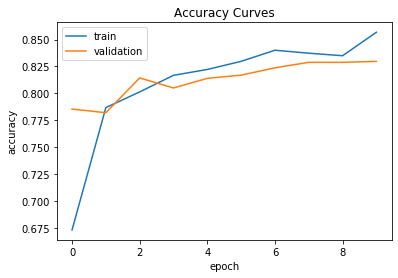

In [163]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Curves')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

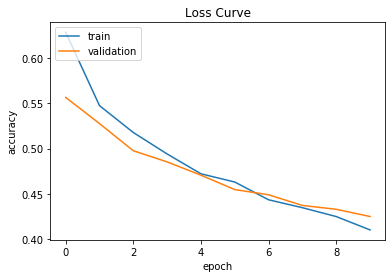

In [164]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [165]:
yhat_classes = model.predict_classes(X_test, verbose=0)

In [166]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, yhat_classes)
print(precision)

0.8539523949456362


In [169]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, yhat_classes)
print(recall)

0.8798062367544657
